In [1]:
import pandas as pd

In [28]:
df = pd.read_csv("data/time-series/WMT_2006-01-01_to_2018-01-01.csv",index_col="Date")

In [29]:
df

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,46.36,46.66,45.57,46.23,23413900,WMT
2006-01-04,46.24,46.50,46.10,46.32,14090700,WMT
2006-01-05,46.00,46.40,45.29,45.69,20759200,WMT
2006-01-06,45.69,45.88,45.10,45.88,21135000,WMT
2006-01-09,45.89,46.15,45.56,45.71,14890700,WMT
...,...,...,...,...,...,...
2017-12-22,98.29,98.42,97.68,98.21,5478682,WMT
2017-12-26,98.35,99.44,98.35,99.16,4295891,WMT
2017-12-27,99.56,99.60,98.83,99.26,5140793,WMT


## Analysis

In [34]:
train = df[0:2500]
test = df[2500:]
y_train =train["Close"]
y_test= test["Close"]

## 1. Naive Random Walk

## 2. Naive Seasonal

## 3.  Simple Exponential Smoothing

In [35]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

/home/cwcollins/.local/share/virtualenvs/crawto-LwgXxa6A/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  if date_index and not is_monotonic:
/home/cwcollins/.local/share/virtualenvs/crawto-LwgXxa6A/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  prediction_index = self.data.row_labels[start:end + 1]
/home/cwcollins/.local/share/virtualenvs/crawto-LwgXxa6A/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  if date_index and not is_monotonic:
/home/cwcollins/.local/share/virtualenvs/crawto-LwgXxa6A/lib/python3.6/site-packages/statsmod

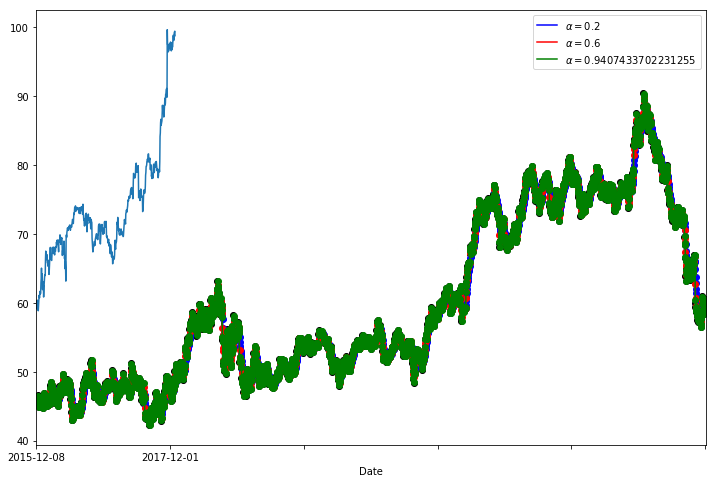

In [36]:
fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(y_train).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(y_train).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = y_train.plot(marker='o', color='black', figsize=(12,8))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast2.plot(marker='o', ax=ax, color='red', legend=True)

fit2.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')

y_test.plot()
plt.show()



## 4. Moving Averages

## 5. Croston's Method

## 6. Optimized Croston’s method

## 7. Syntetos-Boylan Approximation

## 8.Teunter-Syntetos-Babaimethod

## 9. Aggregate-Disaggregate Intermittent Demand Approach

## 10. Intermittent Multiple Aggregation Prediction Algorithm

In [5]:
from prefect import task, Flow